In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def rho(r,d,w,t,e,q):       
    if np.linalg.norm(r-d/2*np.array([0,0,1], float))<e:
        return q*(1/e**3)*np.cos(w*t)
    elif np.linalg.norm(r+d/2*np.array([0,0,1], float))<e:  
        return -q*(1/e**3)*np.cos(w*t)       
    else:                  
        return 0

In [25]:
def j(r,d,w,t,e, q):  
    if np.sqrt(r[0]**2+r[1]**2)<e and -d/2+e/2<r[2]<d/2-e/2:   
        return -4/3*w*q*np.sin(w*t)*np.array([0,0,1], float)/e**2   
    else:                 
        return np.zeros(3)

In [26]:
#pip install scipy

In [27]:
import scipy.integrate

In [28]:
#scipy.integrate.tplquad?

In [29]:
d = 0.5
q = 1e-5
w = np.pi
e = 1e-1
c = 299792458.0
##epsilon_0 = 1e-9
epsilon_0 = 8.85418e-12
#mu_0 = 1
##mu_0 = 4*np.pi*e-10
mu_0 = 4*np.pi*e-7

In [30]:
# #d>>e#q<<1
# d = 1
# w = np.pi
# e = 1e-8
# c = 1
# ##epsilon_0 = 1e-9
# epsilon_0 = 1
# #mu_0 = 1
# ##mu_0 = 4*np.pi*e-10
# mu_0 = 1

In [31]:
Rho = lambda r,t: rho(np.array([r[2],r[1],r[0]],float),d,w,t,e,q)
J = lambda r,t: j(np.array([r[2],r[1],r[0]], float),d,w,t,e,q)

In [10]:
def phi_integrand(rho, r, r_p, t, epsilon=1e-8):    
    if np.linalg.norm(r-r_p) < epsilon:           
        return 0        
    else:           
        return 1/(4*np.pi*epsilon_0)*(rho(r_p,t-np.linalg.norm(r-r_p)/c))/np.linalg.norm(r-r_p)
def A_integrand(j,r,r_p,t, epsilon=1e-8):               
        if np.linalg.norm(r-r_p) < epsilon:         
            return np.zeros(3)       
        else:             
            return mu_0/(4*np.pi)*(j(r_p,t-np.linalg.norm(r-r_p)/c))/np.linalg.norm(r-r_p)
                    

In [11]:
def phi(r,t):    
    return scipy.integrate.tplquad(lambda x,y,z: phi_integrand(Rho, r, np.array([x,y,z], float), t),          
                                   -np.inf,                                                  
                                   np.inf,                                                   
                                   lambda x: -np.inf,                                        
                                   lambda x: np.inf,                                         
                                   lambda x,y: -np.inf,                                     
                                   lambda x,y: np.inf                                          
                                  )
def A(r,t):       
    return np.array([scipy.integrate.tplquad(lambda x,y,z: A_integrand(J, r, np.array([x,y,z], float), t)[i],       
                                             -np.inf,                                                      
                                             np.inf,                       
                                             lambda x: -np.inf,   
                                             lambda x: np.inf,    
                                             lambda x,y: -np.inf, 
                                             lambda x,y: np.inf   
                                            )  for i in range(3)],float)

In [12]:
A_integrand(J,np.array([1,2,3]),np.array([0,0,0], float), 0.5)

array([0.        , 0.        , 0.00051166])

In [13]:
scipy.integrate.tplquad(lambda x,y,z:0,-np.inf,np.inf, 
                        lambda x: -np.inf,             
                        lambda x: np.inf,              
                        lambda x,y: -np.inf,  
                        lambda x,y: np.inf)

(0.0, 0)

In [14]:
phi(np.array([1e-1,2e-2,1e-1], float), 0.5)

(8.243215559813566e-12, 1.4880889801786923e-08)

In [15]:
#import matplotlib.pyplot as pltfig, ax = plt.subplots()

In [16]:
j(np.array([0,0,0.00064371],float),d,w,0.5,e,q)

array([-0.        , -0.        , -0.00418879])

In [17]:
J(np.array([0,0,0], float), 0.5)

array([-0.        , -0.        , -0.00418879])

In [18]:
# scipy.integrate.tplquad(lambda z,y,x: np.exp(-x**2-y**2-z**2),                               
#                         -np.inf,                                                       
#                         np.inf,                                                        
#                         lambda x: -np.inf,                                             
#                         lambda x: np.inf,                                              
#                         lambda x,y: -np.inf,                                           
#                         lambda x,y: np.inf                                                          )

In [19]:
# np.array([scipy.integrate.tplquad(lambda x,y,z: np.exp(-x**2-y**2-z**2),  
#                                   -np.inf,                                                                                                        np.inf,                                                                                                    lambda x: -np.inf,                                                                                         lambda x: np.inf,                                                                                           lambda x,y: -np.inf,                                                                                         lambda x,y: np.inf                                                                                             )  for i in range(3)],float)

In [20]:
def phi(r,t):    
    return scipy.integrate.tplquad(lambda x,y,z: phi_integrand(Rho, r, np.array([x,y,z], float), t),          
                                   -1,                                                  
                                   1,                                                   
                                   lambda x: -1,                                        
                                   lambda x: 1,                                         
                                   lambda x,y: -1,                                     
                                   lambda x,y: 1                                          
                                  )

In [21]:
# import matplotlib.pyplot as plt
# x, y = np.meshgrid(np.arange(-2,2,1), np.arange(-2,2,2))
# ax = plt.subplot(projection='3d')
# f = np.vectorize(lambda x,y:phi(Rho,np.array([1,2,3], float),np.array([x,y,d/2],float),0.25),signature="(),()->()")
# ax.plot_surface(x,y,f(x,y))

In [ ]:
import matplotlib.pyplot as plt
x, y = np.meshgrid(np.arange(-10,10,4), np.arange(-10,10,4))
ax = plt.subplot(projection='3d')
f = np.vectorize(lambda x,y:1e12*phi(np.array([x,y,5],float),0.5)[0],signature="(),()->()")
ax.plot_surface(x,y,f(x,y))

In [ ]:
import matplotlib.pyplot as plt
x, y = np.meshgrid(np.arange(-1,1,0.1), np.arange(-1,1,0.1))
ax = plt.subplot(projection='3d')
f = np.vectorize(lambda x,y:A_integrand(J,np.array([x,y,0], float),np.zeros(3),0.5)[2],signature="(),()->()")
ax.plot_surface(x,y,f(x,y))

In [ ]:
# x, y = np.meshgrid(np.arange(-0.5,0.5,0.25), np.arange(-0.5,0.5,0.25))
# ax = plt.subplot(projection='3d')
# f = np.vectorize(lambda x,y:A(np.array([x,y,0], float),0.5)[2][0],signature="(),()->()")
# ax.plot_surface(x,y,f(x,y))

In [22]:
def A(r,t):       
    return np.array([scipy.integrate.tplquad(lambda x,y,z: A_integrand(J, r, np.array([x,y,z], float), t)[i],       
                                             -1,                                                      
                                             1,                       
                                             lambda x: -1,   
                                             lambda x: 1,    
                                             lambda x,y: -1, 
                                             lambda x,y: 1   
                                            )  for i in range(3)],float)

In [23]:
A(np.array([0.1,0.1,0.1], float),0)

array([[-0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00],
       [-2.28849218e-13,  1.22643766e-11]])

In [24]:
A_integrand(J,np.array([1,1,10], float),np.zeros(3),0.5)

array([0.        , 0.        , 0.00018956])

MovieWriter ffmpeg unavailable; using Pillow instead.


KeyboardInterrupt: 

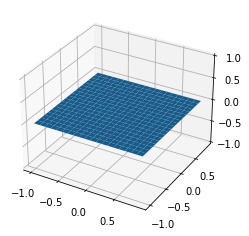

In [25]:
#%matplotlib qt
# from matplotlib.animation import FuncAnimation
# x, y = np.meshgrid(np.arange(-1,1,0.1), np.arange(-1,1,0.1))
# fig = plt.figure()
# ax = plt.subplot(projection='3d')
# f = np.vectorize(lambda x,y,t:A_integrand(J,np.array([x,y,0], float),np.zeros(3),t)[2],signature="(),(),()->()")
# def update(t):
#     ax.clear()
#     ax.plot_surface(x,y,f(x,y,t))
#     ax.set_zlim(-1,1)
# anim = FuncAnimation(fig,update, frames=np.linspace(0,2,60*3), interval=1/60)
# anim.save("a.gif")

In [ ]:
ani.save()

In [ ]:
# @jit(nopython=True)
# def phi(r,t):    
#     return scipy.integrate.tplquad(lambda x,y,z: phi_integrand(Rho, r, np.array([x,y,z], float), t),          
#                                    -1,                                                      
#                                     1,                       
#                                     lambda x: -1,   
#                                     lambda x: 1,    
#                                     lambda x,y: -1, 
#                                     lambda x,y: 1                                           
#                                   )

In [ ]:
phi(np.array([1,2,3], float), 0)

In [ ]:
%%timeit
1e12*phi(np.array([0.1,0.1,5],float),0.5)[0]

In [ ]:
%%timeit
1e12*phi(np.array([0.1,0.1,5],float),0.5)[0]

In [ ]:
# pip install numba

In [ ]:
# from numba import jit

In [1]:
import scipy as sp
import numdifftools as nd

In [ ]:
def curl(f,x):
    jac = nd.Jacobian(f)(x)
    return np.array([jac[2,1]-jac[1,2],jac[0,2]-jac[2,0],jac[1,0]-jac[0,1]])

def B(x,t):
    return curl(lambda x: A(x,t), x)

In [29]:
B(np.array([1,2,3]),0)

<ipython-input-28-0573e14c44b2>:3: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  return sp.array([jac[2,1]-jac[1,2],jac[0,2]-jac[2,0],jac[1,0]-jac[0,1]])


array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
def B(r,t,A, epsilon):
    return np.array([
        (A(r+epsilon(np.array([1 if j==i else 0 for j in range(3)],float)),t)-A(r,t))/epsilon
    ] for i in range(3)
    )

In [2]:
from manim import *

In [17]:
class Field(ThreeDScene):
    def construct(self):
        v = ArrowVectorField(lambda x: E(x,0))
        self.add(v)
        self.wait()

In [22]:
%manim Field

NameError: name 'E' is not defined